<a href="https://colab.research.google.com/github/keigomiyagawa/hello_world/blob/main/DRPP_instance_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期グリッドの生成

In [12]:
import matplotlib.pyplot as plt
from IPython.core.display import deepcopy
import copy
import sys
import random
random.seed(1234)

GRIDSIZE = 10
n = m = GRIDSIZE
N = range(n)
xx = list() #x座標
yy = list() #y座標
point = list()
NODE = dict()
# NODE_LISTの要素は点番号：node_num,点のx座標：node_x，点のy座標：node_y，点の次数:node_degreeの辞書リスト
NODE_LIST = list()
dem = list() #demand
# p = 

for i in range(1,n+1):
    for j in range(1,n+1):
        NODE = {}
        point.append([i,j])
# print(point)
colors = ['green' for i in range(len(point))]
data_index = [j for j in range(len(point))]

print(len(data_index))
print(len(point))

for i in range(len(point)):
    NODE = {'node_num':data_index[i],'node_x':point[i][0], 'node_y':point[i][1],'node_degree':0}
    NODE_LIST.append(NODE)
print(NODE_LIST[0])

# # plot graph
# for i in range(len(NODE_LIST)):
#     x = NODE_LIST[i]['node_x']
#     y = NODE_LIST[i]['node_y']

#     plt.rcParams["figure.figsize"] = (30, 30)
#     plt.scatter(x, y, color=colors[i])
#     plt.annotate(NODE_LIST[i]['node_num'], xy = (x,y))

100
100
{'node_num': 0, 'node_x': 1, 'node_y': 1, 'node_degree': 0}


# 初期辺の追加

[{'node_num': 0, 'node_x': 1, 'node_y': 1, 'node_degree': 2}, {'node_num': 1, 'node_x': 1, 'node_y': 2, 'node_degree': 3}, {'node_num': 2, 'node_x': 1, 'node_y': 3, 'node_degree': 5}, {'node_num': 3, 'node_x': 1, 'node_y': 4, 'node_degree': 4}, {'node_num': 4, 'node_x': 1, 'node_y': 5, 'node_degree': 3}, {'node_num': 5, 'node_x': 1, 'node_y': 6, 'node_degree': 3}, {'node_num': 6, 'node_x': 1, 'node_y': 7, 'node_degree': 4}, {'node_num': 7, 'node_x': 1, 'node_y': 8, 'node_degree': 5}, {'node_num': 8, 'node_x': 1, 'node_y': 9, 'node_degree': 4}, {'node_num': 9, 'node_x': 1, 'node_y': 10, 'node_degree': 3}, {'node_num': 10, 'node_x': 2, 'node_y': 1, 'node_degree': 4}, {'node_num': 11, 'node_x': 2, 'node_y': 2, 'node_degree': 6}, {'node_num': 12, 'node_x': 2, 'node_y': 3, 'node_degree': 6}, {'node_num': 13, 'node_x': 2, 'node_y': 4, 'node_degree': 6}, {'node_num': 14, 'node_x': 2, 'node_y': 5, 'node_degree': 4}, {'node_num': 15, 'node_x': 2, 'node_y': 6, 'node_degree': 5}, {'node_num': 16,

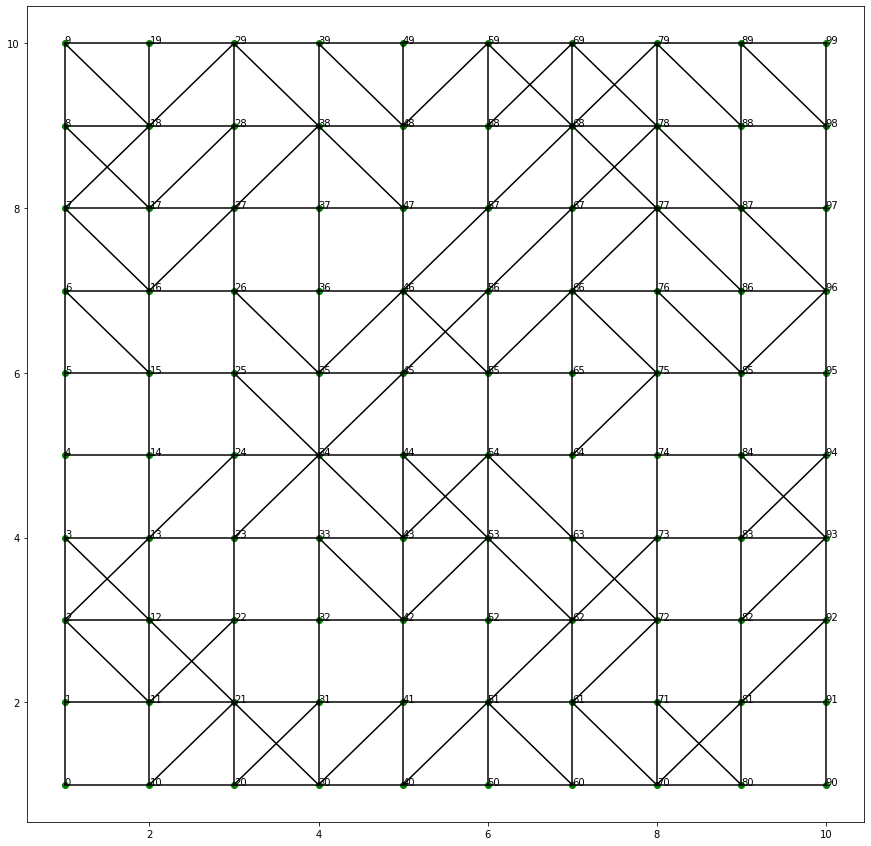

In [13]:
#EDGE_LISTの要素は，始点の点番号：start_node,終点の点番号：end_nodeの辞書型リスト（＋コスト：）
EDGE_LIST = list()
edge = dict()
diagonal_p = 0.4

def update_degree(start_node,end_node):
    for i in range(len(NODE_LIST)):
        node_num = NODE_LIST[i]['node_num']
        if node_num == start_node:
            NODE_LIST[i]['node_degree'] += 1
        if node_num == end_node:
            NODE_LIST[i]['node_degree'] += 1

# add verticals
for k in range(0,n*m,GRIDSIZE):
    for i in range(k,GRIDSIZE+k,GRIDSIZE):
        for j in range(i,GRIDSIZE+i-1):
            start_node = j
            end_node = j+1
            edge = {'start_node':start_node,'end_node':end_node}
            update_degree(start_node,end_node)
            EDGE_LIST.append(edge)

# add horizons
for i in range(GRIDSIZE):
    for j in range(0+i,n*m+i-GRIDSIZE,GRIDSIZE):
        # print(j,j+GRIDSIZE)
        start_node = j
        end_node = j+GRIDSIZE
        edge = {'start_node':start_node,'end_node':end_node}
        update_degree(start_node,end_node)
        EDGE_LIST.append(edge)

## add diagonals
# upper right
for k in range(0,n*m-GRIDSIZE,GRIDSIZE):
    for i in range(k,GRIDSIZE+k,GRIDSIZE):
        for j in range(i,GRIDSIZE+i-1):
            # print(j,j+GRIDSIZE+1)

            # 一定確率で対角線を追加
            gen_rand = random.random()
            if gen_rand < diagonal_p:
                start_node = j
                end_node = j+GRIDSIZE+1
                edge = {'start_node':start_node,'end_node':end_node}
                update_degree(start_node,end_node)
                EDGE_LIST.append(edge)

# upper left
for k in range(n*m-GRIDSIZE,0,-GRIDSIZE):
    for i in range(k,GRIDSIZE+k,GRIDSIZE):
        for j in range(i,GRIDSIZE+i-1):
            # print(j-GRIDSIZE+1,j)

            # 一定確率で対角線を追加
            gen_rand = random.random()
            if gen_rand < diagonal_p:
                start_node = j-GRIDSIZE+1
                end_node = j
                edge = {'start_node':start_node,'end_node':end_node}
                update_degree(start_node,end_node)
                EDGE_LIST.append(edge)

print(NODE_LIST)
print(EDGE_LIST)

# backup
# edge_list = list()
# # add verticals
# for k in range(0,n*m,GRIDSIZE):
#     for i in range(k,GRIDSIZE+k,GRIDSIZE):
#         for j in range(i,GRIDSIZE+i-1):
#             # print(j,j+1)
#             edge_list.append([j,j+1])

# # add horizons
# for i in range(GRIDSIZE):
#     for j in range(0+i,n*m+i-GRIDSIZE,GRIDSIZE):
#         # print(j,j+GRIDSIZE)
#         edge_list.append([j,j+GRIDSIZE])

# ## add diagonals
# # upper right
# for k in range(0,n*m-GRIDSIZE,GRIDSIZE):
#     for i in range(k,GRIDSIZE+k,GRIDSIZE):
#         for j in range(i,GRIDSIZE+i-1):
#             # print(j,j+GRIDSIZE+1)

#             # 一定確率で対角線を追加
#             gen_rand = random.random()
#             if gen_rand < diagonal_p:
#                 edge_list.append([j,j+GRIDSIZE+1])
# # upper left
# for k in range(n*m-GRIDSIZE,0,-GRIDSIZE):
#     for i in range(k,GRIDSIZE+k,GRIDSIZE):
#         for j in range(i,GRIDSIZE+i-1):
#             # print(j-GRIDSIZE+1,j)

#             # 一定確率で対角線を追加
#             gen_rand = random.random()
#             if gen_rand < diagonal_p:
#                 edge_list.append([j-GRIDSIZE+1,j])

### plot graph
# Plot point
for i in range(len(NODE_LIST)):
    x = NODE_LIST[i]['node_x']
    y = NODE_LIST[i]['node_y']

    plt.rcParams["figure.figsize"] = (15, 15)
    plt.scatter(x, y, color=colors[i])
    plt.annotate(NODE_LIST[i]['node_num'], xy = (x,y))
# Plot initial_edge
for i in range(len(EDGE_LIST)):
    u, v = EDGE_LIST[i]['start_node'], EDGE_LIST[i]['end_node']
    # print(u,v)
    # print(point[u][0], point[v][0], point[u][1], point[v][1])
    plt.plot([point[u][0], point[v][0]], [point[u][1], point[v][1]], color="black")

# オイラー閉路をランダムに生成

In [11]:
#p probability that an edge of the original grid is declared required
p = 0.2

removed_edge_temp = copy.deepcopy(EDGE_LIST)

remove_p = 1-p
REM_EDGE_LIST = list()
removed_point= copy.deepcopy(point)
# print(removed_edge_temp)

for i in range(len(removed_edge_temp)):
    gen_rand = random.random()
    if gen_rand < remove_p:
        removed_edge_temp[i] = 0
# print(removed_edge_temp)
for i in removed_edge_temp:
    if i == 0:
        continue
    REM_EDGE_LIST.append(i)
# print(REM_EDGE_LIST)

# remove not important point
print(REM_EDGE_LIST)
temp = sum(REM_EDGE_LIST,[])
print(temp)
print(removed_point)
for i in range(len(removed_point)):
    if removed_point[i] in temp:
        continue
    removed_point[i] = -1
print(removed_point)

# # backup
# for i in range(len(removed_edge_temp)):
#     gen_rand = random.random()
#     if gen_rand < remove_p:
#         removed_edge_temp[i] = 0
# # print(removed_edge_temp)
# for i in removed_edge_temp:
#     if i == 0:
#         continue
#     removed_edge.append(i)
# # print(removed_edge)

# # remove not important point
# print(removed_edge)
# temp = sum(removed_edge,[])
# print(temp)
# print(removed_point)
# for i in range(len(removed_point)):
#     if removed_point[i] in temp:
#         continue
#     removed_point[i] = -1
# print(removed_point)

### plot graph
# Plot point
for i in range(len(NODE_LIST)):
    x = NODE_LIST[i]['node_x']
    y = NODE_LIST[i]['node_y']

    plt.rcParams["figure.figsize"] = (15, 15)
    plt.scatter(x, y, color=colors[i])
    plt.annotate(NODE_LIST[i]['node_num'], xy = (x,y))
# Plot initial_edge
for i in range(len(EDGE_LIST)):
    u, v = EDGE_LIST[i]['start_node'], EDGE_LIST[i]['end_node']
    # print(u,v)
    # print(point[u][0], point[v][0], point[u][1], point[v][1])
    plt.plot([point[u][0], point[v][0]], [point[u][1], point[v][1]], color="black")

NameError: ignored